In [2]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
from options_freedom.symbol.vix import vix

In [3]:
# open methods
dir_path = os.getcwd()
def gen_results_path(filename: str):
    return os.path.join(dir_path, "", filename)

In [4]:
filename = "BullPutSpread_30_15_45_20_200_75_ligth"

In [5]:
with open(gen_results_path(filename), "rb") as f:
    trades = pickle.load(f)
len(trades)

63

In [6]:
dates = list(trades.keys())
profits = [t['profit_loss'] for t in trades.values()]
p_l_cumm = np.cumsum(profits)

### Plotting

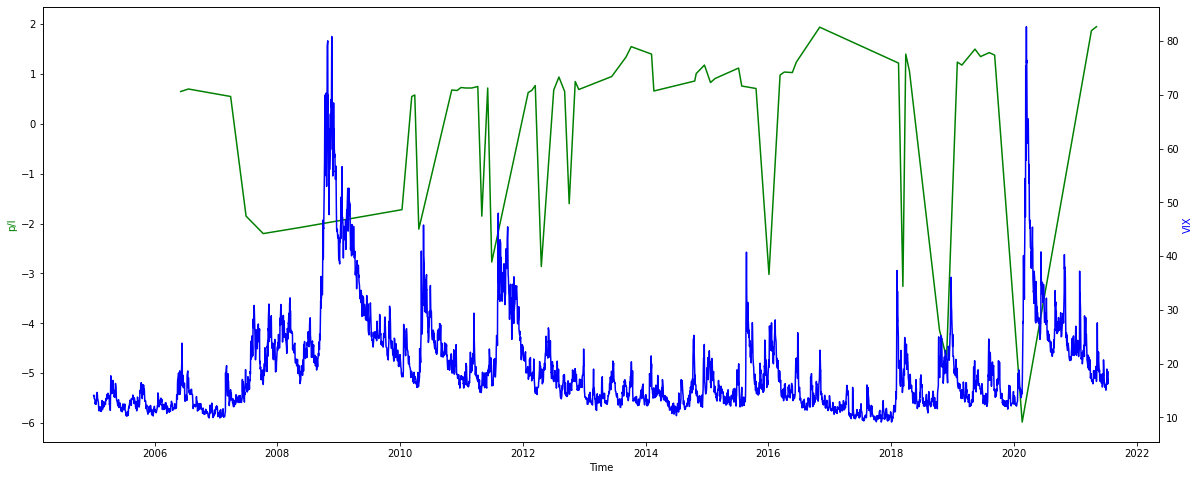

In [7]:
fig, ax1 = plt.subplots(figsize=(20,8))

ax2 = ax1.twinx()
ax1.plot(dates, profits, 'g-')
ax2.plot(vix._df['time_stamp'], vix._df['bid'], 'b-')

ax1.set_xlabel('Time')
ax1.set_ylabel('p/l', color='g')
ax2.set_ylabel('VIX', color='b')

plt.show()

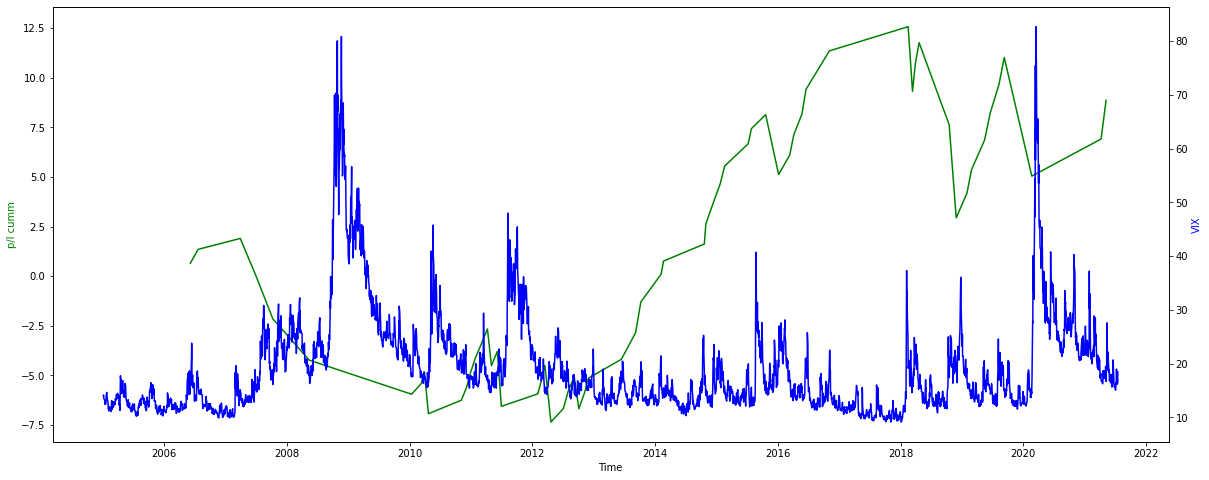

In [8]:
fig, ax1 = plt.subplots(figsize=(20,8))

ax2 = ax1.twinx()
ax1.plot(dates, p_l_cumm, 'g-')
ax2.plot(vix._df['time_stamp'], vix._df['bid'], 'b-')

ax1.set_xlabel('Time')
ax1.set_ylabel('p/l cumm', color='g')
ax2.set_ylabel('VIX', color='b')

plt.show()

In [9]:
total_p_l = sum([x for x in profits if x is not None])
print(f'Total P/L: {total_p_l}')

Total P/L: 8.860000000000005


In [15]:
average_profit = total_p_l / len(profits)
print(f'Average profit: {average_profit}')

Average profit: 0.14063492063492072


In [16]:
average_max_loss = sum([t['max_loss'] for t in trades.values()]) / len(list(trades.values()))
print(f"Average max loss: {average_max_loss}")

Average max loss: 8.809841269841266


In [17]:
average_max_profit = sum([t['max_profit'] for t in trades.values()]) / len(list(trades.values()))
print(f"Average max profit: {average_max_profit}")

Average max profit: 1.2258730158730164


In [18]:
average_trade_length = sum([(t['finish_stamp'] - t['start_stamp']).days for t in trades.values()]) / len(list(trades.values()))
print(f"Average trade in days: {average_trade_length}")

Average trade in days: 24.349206349206348


In [21]:
average_return_per_month = (average_profit / average_trade_length) * (average_trade_length/30)
print(f"Average return per month: {average_return_per_month * 100} %")

Average return per month: 0.468783068783069 %
